<a href="https://colab.research.google.com/github/Ali-Hasan-Khan28/Computer-Vision/blob/main/Lab01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opencv-python

In [4]:
pip install pyav


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.3/27.3 MB 35.5 MB/s eta 0:00:00


# Task 1 : 2D Geometric Transformation

In [5]:
import av
import imageio

def convert_avif_to_png(avif_path, png_path):
    # Open the AVIF file
    container = av.open(avif_path)

    # Extract the first (and usually only) stream
    stream = container.streams.video[0]

    # Read all video frames
    frames = [frame.to_image() for frame in container.decode(video=0)]

    # Save the first frame as PNG
    frames[0].save(png_path)

# Example usage:
avif_file_path = '/content/drive/MyDrive/Colab_Notebooks/Computer Vision Lab/2d_image_Lab01.avif'
png_output_path = '/content/drive/MyDrive/Colab_Notebooks/Computer Vision Lab/2d_image_Lab01.png'

convert_avif_to_png(avif_file_path, png_output_path)


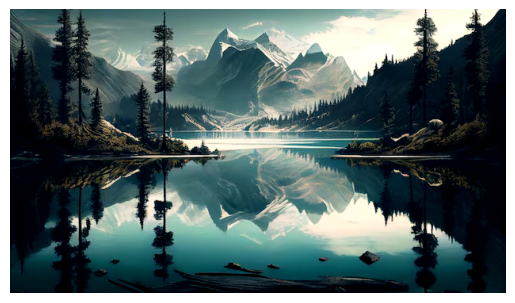

In [7]:
import cv2
import matplotlib.pyplot as plt

# Replace 'your_image_path.jpg' with the path to your 2D image
image_path = '/content/drive/MyDrive/Colab_Notebooks/Computer Vision Lab/2d_image_Lab01.png'

# Load the image
image = cv2.imread(image_path)

# OpenCV loads images in BGR format, convert it to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis labels
plt.show()


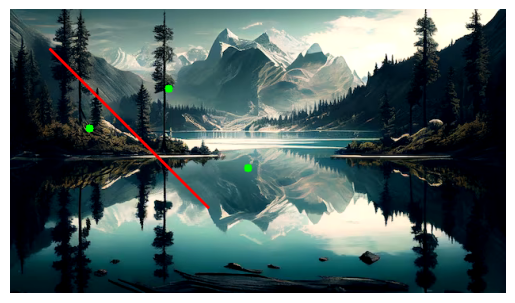

In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def draw_points(image, points, color=(0, 255, 0), radius=5):
    for point in points:
        cv2.circle(image, tuple(point), radius, color, -1)

def draw_line(image, point1, point2, color=(255, 0, 0), thickness=2):
    cv2.line(image, tuple(point1), tuple(point2), color, thickness)

# Load the image
image_path = '/content/drive/MyDrive/Colab_Notebooks/Computer Vision Lab/2d_image_Lab01.png'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Example: Define 2D points and a line
points = [(100, 150), (200, 100), (300, 200)]
line_start = (50, 50)
line_end = (250, 250)

# Draw points and line on the image
draw_points(image_rgb, points)
draw_line(image_rgb, line_start, line_end)

# Display the image with points and line
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


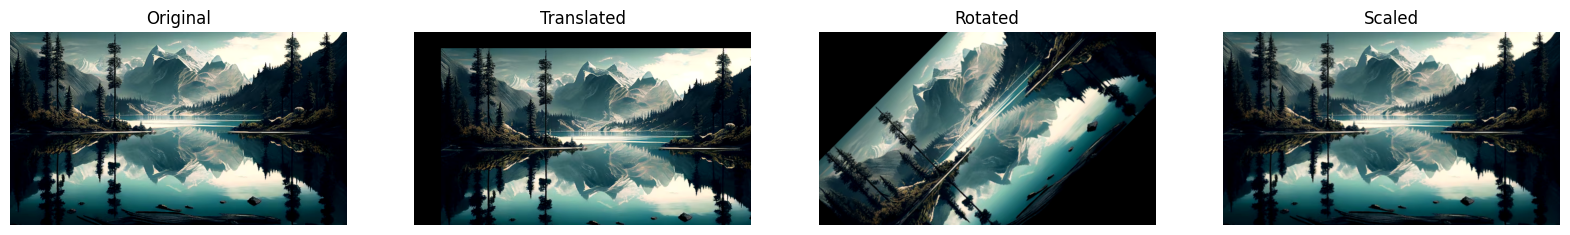

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def translate(image, tx, ty):
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_image = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))
    return translated_image

def rotate(image, angle):
    rotation_matrix = cv2.getRotationMatrix2D((image.shape[1] // 2, image.shape[0] // 2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))
    return rotated_image

def scale(image, scale_factor):
    scaled_image = cv2.resize(image, None, fx=scale_factor, fy=scale_factor)
    return scaled_image

# Load the image
image_path = '/content/drive/MyDrive/Colab_Notebooks/Computer Vision Lab/2d_image_Lab01.png'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Example: Apply translation, rotation, and scaling
translated_image = translate(image_rgb, 50, 30)
rotated_image = rotate(image_rgb, 45)
scaled_image = scale(image_rgb, 1.5)

# Display the original and transformed images
plt.figure(figsize=(20, 8))

plt.subplot(1, 4, 1)
plt.imshow(image_rgb)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(translated_image)
plt.title('Translated')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(rotated_image)
plt.title('Rotated')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(scaled_image)
plt.title('Scaled')
plt.axis('off')

plt.show()


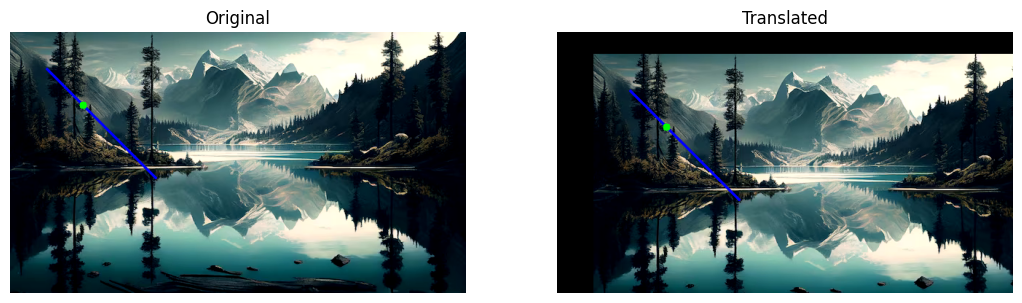

In [18]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def translate(image, tx, ty):
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_image = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))
    return translated_image

def rotate(image, angle):
    rotation_matrix = cv2.getRotationMatrix2D((image.shape[1] // 2, image.shape[0] // 2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))
    return rotated_image

def scale(image, scale_factor):
    scaled_image = cv2.resize(image, None, fx=scale_factor, fy=scale_factor)
    return scaled_image

def draw_point(image, point):
    return cv2.circle(image.copy(), tuple(point), 5, (0, 255, 0), -1)

def draw_line(image, start_point, end_point):
    return cv2.line(image.copy(), tuple(start_point), tuple(end_point), (0, 0, 255), 2)

# Load the image
image_path = '/content/drive/MyDrive/Colab_Notebooks/Computer Vision Lab/2d_image_Lab01.png'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define points and lines
original_point = (100, 100)
transformed_point = (original_point[0] + 50, original_point[1] + 30)

original_line = ((50, 50), (200, 200))

# Apply translation to points and lines
translated_image = translate(image_rgb, 50, 30)
translated_point = (original_point[0] + 50, original_point[1] + 30)
translated_line = ((50 + 50, 50 + 30), (200 + 50, 200 + 30))

# Display the original and transformed images with points and lines
plt.figure(figsize=(20, 4))

plt.subplot(1, 3, 1)
plt.imshow(draw_point(draw_line(image_rgb, *original_line), original_point))
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(draw_point(draw_line(translated_image, *translated_line), translated_point))
plt.title('Translated')
plt.axis('off')

plt.show()


# Task 2 : 3D Geometric Transformation


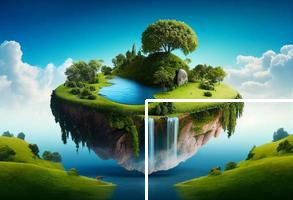

In [29]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load an image from your directory
image_path = '/content/drive/MyDrive/Colab_Notebooks/Computer Vision Lab/3d_image_lab01.jpg'  # Replace with the actual path to your image
original_image = cv2.imread(image_path)

# Check if the image is loaded successfully
if original_image is None:
    print(f"Error: Unable to load the image from {image_path}")
    exit()

# Get the dimensions of the image
height, width, _ = original_image.shape

# Create a 3D cube as before
cube_size = 100
cube_vertices = np.array([
    [0, 0, 0],
    [cube_size, 0, 0],
    [cube_size, cube_size, 0],
    [0, cube_size, 0],
    [0, 0, cube_size],
    [cube_size, 0, cube_size],
    [cube_size, cube_size, cube_size],
    [0, cube_size, cube_size]
], dtype=np.float32)

cube_edges = [
    (0, 1), (1, 2), (2, 3), (3, 0),
    (4, 5), (5, 6), (6, 7), (7, 4),
    (0, 4), (1, 5), (2, 6), (3, 7)
]

# Create a projection matrix for 3D to 2D transformation
K = np.array([
    [500, 0, width // 2],
    [0, 500, height // 2],
    [0, 0, 1]
], dtype=np.float32)

# Project 3D cube vertices to 2D
cube_vertices_2d, _ = cv2.projectPoints(cube_vertices, np.eye(3), np.zeros((3, 1)), K, None)

# Draw cube edges on the original image
for edge in cube_edges:
    pt1 = tuple(map(int, cube_vertices_2d[edge[0]].ravel()))
    pt2 = tuple(map(int, cube_vertices_2d[edge[1]].ravel()))
    cv2.line(original_image, pt1, pt2, (255, 255, 255), 2)

# Display the original image with the 3D cube overlay
cv2_imshow(original_image)


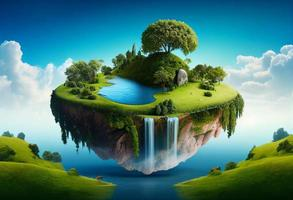

In [31]:
def draw_3d_objects(image, points_3d, lines_3d, planes_3d):
    # Get the dimensions of the image
    height, width, _ = image.shape

    # Create a projection matrix for 3D to 2D transformation
    K = np.array([
        [500, 0, width // 2],
        [0, 500, height // 2],
        [0, 0, 1]
    ], dtype=np.float32)

    # Convert 3D points to appropriate scale for visualization
    scale_factor = 0.1
    points_3d_scaled = points_3d * scale_factor

    # Project scaled 3D points to 2D
    points_2d, _ = cv2.projectPoints(points_3d_scaled, np.eye(3), np.zeros((3, 1)), K, None)

    # Draw 3D lines on the image
    for line in lines_3d:
        pt1 = tuple(map(int, points_2d[line[0]].ravel()))
        pt2 = tuple(map(int, points_2d[line[1]].ravel()))
        cv2.line(image, pt1, pt2, (255, 255, 255), 2)

    # Draw 3D planes on the image
    for plane in planes_3d:
        points = np.array([points_2d[i] for i in plane], dtype=np.int32)
        points = points.reshape((-1, 1, 2))
        cv2.polylines(image, [points], isClosed=True, color=(255, 255, 255), thickness=2)

    return image

# Example usage:

# Load an image from your directory
image_path = '/content/drive/MyDrive/Colab_Notebooks/Computer Vision Lab/3d_image_lab01.jpg'  # Replace with the actual path to your image
original_image = cv2.imread(image_path)

# Check if the image is loaded successfully
if original_image is None:
    print(f"Error: Unable to load the image from {image_path}")
    exit()

# Define 3D points, lines, and planes
points = np.array([
    [50, 50, 50],
    [100, 100, 100],
    [150, 150, 150],
], dtype=np.float32)

lines = [(0, 1), (1, 2)]

planes = [
    [0, 1, 2]
]

# Draw 3D objects on the image
result_image = draw_3d_objects(original_image.copy(), points, lines, planes)

# Display the image with the 3D objects
cv2_imshow(result_image)

(3, 4)
(3, 3)


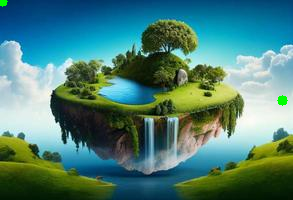

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def translate_3d(points, translation):
    translation_matrix = np.eye(4)
    translation_matrix[:3, 3] = translation
    homogeneous_points = np.hstack([points, np.ones((len(points), 1))])
    translated_points = np.dot(homogeneous_points, translation_matrix.T)
    return translated_points[:, :3]

def rotate_3d(points, angle, axis):
    rotation_matrix = cv2.Rodrigues(np.radians(angle) * axis)[0]
    homogeneous_points = np.hstack([points, np.ones((len(points), 1))])
    print(np.shape(homogeneous_points))
    print(np.shape(rotation_matrix))
    rotated_points = np.dot(homogeneous_points.T, rotation_matrix.T)
    return rotated_points[:, :3]


def scale_3d(points, scale_factors):
    scale_matrix = np.eye(4)
    np.fill_diagonal(scale_matrix, scale_factors)
    homogeneous_points = np.hstack([points, np.ones((len(points), 1))])
    scaled_points = np.dot(homogeneous_points, scale_matrix.T)
    return scaled_points[:, :3]

# Load an image
image_path = '/content/drive/MyDrive/Colab_Notebooks/Computer Vision Lab/3d_image_lab01.jpg'
image = cv2.imread(image_path)

# Check if the image is loaded successfully
if image is None:
    print(f"Error: Unable to load the image from {image_path}")
    exit()

# Define original 3D points
original_points = np.array([
    [50, 50, 50],
    [100, 100, 100],
    [150, 150, 150],
], dtype=np.float32)

# Translation
translation_vector = np.array([50, 0, 0])
translated_points = translate_3d(original_points, translation_vector)

# Rotation
rotation_axis = np.array([0, 1, 0])  # Rotate around the y-axis
rotated_points = rotate_3d(translated_points, 45, rotation_axis)

# Scaling
scale_factors = np.array([2, 1, 1])
scaled_points = scale_3d(rotated_points, scale_factors)

# Visualize the 3D points on the 2D image
for point in scaled_points:
    pt = tuple(map(int, point[:2]))  # Extract x and y coordinates
    cv2.circle(image, pt, 5, (0, 255, 0), -1)  # Draw a green circle at each 2D point

# Display the image with the 3D points
cv2_imshow(image)


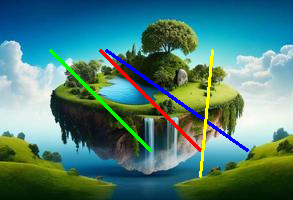

In [26]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def translate_3d(points, translation):
    translation_matrix = np.eye(4)
    translation_matrix[:3, 3] = translation
    homogeneous_points = np.hstack([points, np.ones((len(points), 1))])
    translated_points = np.dot(homogeneous_points, translation_matrix.T)
    return translated_points[:, :3]

def rotate_3d(points, angle, axis):
    rotation_matrix = cv2.Rodrigues(np.radians(angle) * axis)[0]
    #homogeneous_points = np.hstack([points, np.ones((len(points), 1))])
    rotated_points = np.dot(points, rotation_matrix.T)
    return rotated_points[:, :3]



def scale_3d(points, scale_factors):
    scale_matrix = np.eye(4)
    np.fill_diagonal(scale_matrix, scale_factors)
    homogeneous_points = np.hstack([points, np.ones((len(points), 1))])
    scaled_points = np.dot(homogeneous_points, scale_matrix.T)
    return scaled_points[:, :3]

def draw_lines(image, lines, color=(0, 255, 0)):
    for line in lines:
        pt1 = tuple(map(int, line[0][:2]))
        pt2 = tuple(map(int, line[1][:2]))
        cv2.line(image, pt1, pt2, color, 2)

# Load an image
image_path = '/content/drive/MyDrive/Colab_Notebooks/Computer Vision Lab/3d_image_lab01.jpg'
image = cv2.imread(image_path)

# Check if the image is loaded successfully
if image is None:
    print(f"Error: Unable to load the image from {image_path}")
    exit()

# Define original 3D points
original_points = np.array([
    [50, 50, 50],
    [100, 100, 100],
    [150, 150, 150],
], dtype=np.float32)

# Define original 3D lines
original_lines = np.array([
    [[50, 50, 50], [100, 100, 100]],
    [[100, 100, 100], [150, 150, 150]],
    [[150, 150, 150], [50, 50, 50]],
], dtype=np.float32)

# Define original 3D planes (assuming a rectangular plane)
original_plane = np.array([
    [0, 0, 0],
    [100, 0, 0],
    [100, 100, 0],
    [0, 100, 0],
], dtype=np.float32)

# Translation
translation_vector = np.array([50, 0, 0])
translated_points = translate_3d(original_points, translation_vector)
translated_lines = translate_3d(original_lines.reshape(-1, 3), translation_vector).reshape(-1, 2, 3)
translated_plane = translate_3d(original_plane, translation_vector)

# Rotation
rotation_axis = np.array([0, 1, 0])  # Rotate around the y-axis
rotated_points = rotate_3d(translated_points, 45, rotation_axis)
rotated_lines = rotate_3d(translated_lines.reshape(-1, 3), 45, rotation_axis).reshape(-1, 2, 3)[:, :, :2]
rotated_plane = rotate_3d(translated_plane, 45, rotation_axis)

# Scaling
scale_factors = np.array([2, 1, 1])
scaled_points = scale_3d(rotated_points, scale_factors)
scaled_lines = scale_3d(rotated_lines.reshape(-1, 3), scale_factors).reshape(-1, 2, 3)
scaled_plane = scale_3d(rotated_plane, scale_factors)

# Visualize the results
draw_lines(image, original_lines, color=(0, 255, 0))  # Original lines in green
draw_lines(image, translated_lines, color=(0, 0, 255))  # Translated lines in red
draw_lines(image, rotated_lines, color=(255, 0, 0))  # Rotated lines in blue
draw_lines(image, scaled_lines, color=(0, 255, 255))  # Scaled lines in yellow

# Display the image with the 3D lines
cv2_imshow(image)


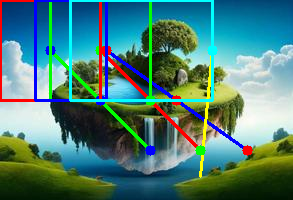

In [27]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def translate_3d(points, translation):
    translation_matrix = np.eye(4)
    translation_matrix[:3, 3] = translation
    homogeneous_points = np.hstack([points, np.ones((len(points), 1))])
    translated_points = np.dot(homogeneous_points, translation_matrix.T)
    return translated_points[:, :3]

def rotate_3d(points, angle, axis):
    rotation_matrix = cv2.Rodrigues(np.radians(angle) * axis)[0]
    rotated_points = np.dot(points, rotation_matrix.T)
    return rotated_points[:, :3]

def scale_3d(points, scale_factors):
    scale_matrix = np.eye(4)
    np.fill_diagonal(scale_matrix, scale_factors)
    homogeneous_points = np.hstack([points, np.ones((len(points), 1))])
    scaled_points = np.dot(homogeneous_points, scale_matrix.T)
    return scaled_points[:, :3]

def draw_lines(image, lines, color=(0, 255, 0)):
    for line in lines:
        pt1 = tuple(map(int, line[0][:2]))
        pt2 = tuple(map(int, line[1][:2]))
        cv2.line(image, pt1, pt2, color, 2)

def draw_points(image, points, color=(255, 0, 0), radius=5):
    for point in points:
        center = tuple(map(int, point[:2]))
        cv2.circle(image, center, radius, color, -1)  # -1 fills the circle

def draw_plane(image, plane, color=(0, 0, 255)):
    for i in range(4):
        pt1 = tuple(map(int, plane[i][:2]))
        pt2 = tuple(map(int, plane[(i + 1) % 4][:2]))
        cv2.line(image, pt1, pt2, color, 2)

# Load an image
image_path = '/content/drive/MyDrive/Colab_Notebooks/Computer Vision Lab/3d_image_lab01.jpg'
image = cv2.imread(image_path)

# Check if the image is loaded successfully
if image is None:
    print(f"Error: Unable to load the image from {image_path}")
    exit()

# Define original 3D points
original_points = np.array([
    [50, 50, 50],
    [100, 100, 100],
    [150, 150, 150],
], dtype=np.float32)

# Define original 3D lines
original_lines = np.array([
    [[50, 50, 50], [100, 100, 100]],
    [[100, 100, 100], [150, 150, 150]],
    [[150, 150, 150], [50, 50, 50]],
], dtype=np.float32)

# Define original 3D planes (assuming a rectangular plane)
original_plane = np.array([
    [0, 0, 0],
    [100, 0, 0],
    [100, 100, 0],
    [0, 100, 0],
], dtype=np.float32)

# Translation
translation_vector = np.array([50, 0, 0])
translated_points = translate_3d(original_points, translation_vector)
translated_lines = translate_3d(original_lines.reshape(-1, 3), translation_vector).reshape(-1, 2, 3)
translated_plane = translate_3d(original_plane, translation_vector)

# Rotation
rotation_axis = np.array([0, 1, 0])  # Rotate around the y-axis
rotated_points = rotate_3d(translated_points, 45, rotation_axis)
rotated_lines = rotate_3d(translated_lines.reshape(-1, 3), 45, rotation_axis).reshape(-1, 2, 3)[:, :, :2]
rotated_plane = rotate_3d(translated_plane, 45, rotation_axis)

# Scaling
scale_factors = np.array([2, 1, 1])
scaled_points = scale_3d(rotated_points, scale_factors)
scaled_lines = scale_3d(rotated_lines.reshape(-1, 3), scale_factors).reshape(-1, 2, 3)
scaled_plane = scale_3d(rotated_plane, scale_factors)

# Visualize the results
draw_lines(image, original_lines, color=(0, 255, 0))  # Original lines in green
draw_lines(image, translated_lines, color=(0, 0, 255))  # Translated lines in red
draw_lines(image, rotated_lines, color=(255, 0, 0))  # Rotated lines in blue
draw_lines(image, scaled_lines, color=(0, 255, 255))  # Scaled lines in yellow

draw_points(image, original_points, color=(255, 0, 0))  # Original points in blue
draw_points(image, translated_points, color=(0, 255, 0))  # Translated points in green
draw_points(image, rotated_points, color=(0, 0, 255))  # Rotated points in red
draw_points(image, scaled_points, color=(255, 255, 0))  # Scaled points in yellow

draw_plane(image, original_plane, color=(0, 0, 255))  # Original plane in red
draw_plane(image, translated_plane, color=(0, 255, 0))  # Translated plane in green
draw_plane(image, rotated_plane, color=(255, 0, 0))  # Rotated plane in blue
draw_plane(image, scaled_plane, color=(255, 255, 0))  # Scaled plane in yellow

# Display the image with the 3D lines, points, and planes
cv2_imshow(image)


# Task 3


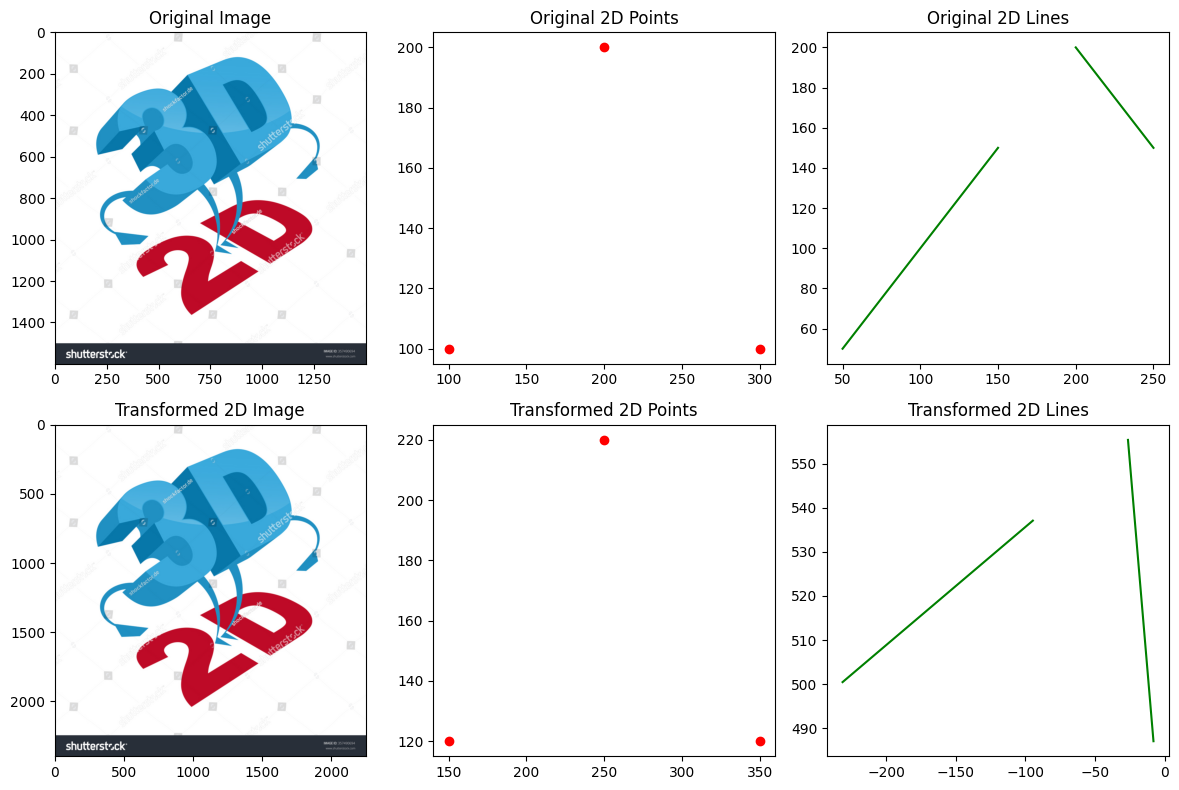

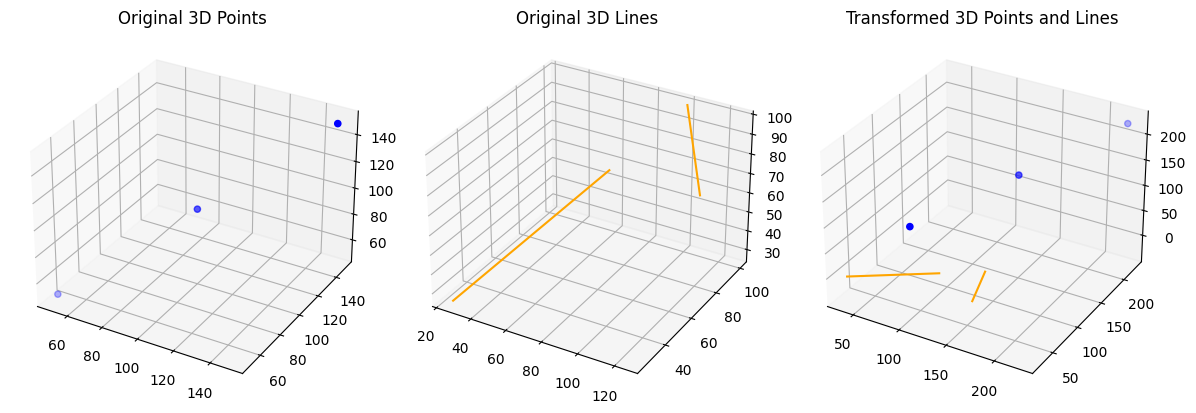

In [31]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def apply_2d_transformations(image, points, lines, translation, rotation_angle, scale_factors):
    # Translate 2D points
    translated_points = points + translation

    # Rotate 2D lines
    rotation_matrix = cv2.getRotationMatrix2D((image.shape[1] // 2, image.shape[0] // 2), rotation_angle, 1)
    rotated_lines = cv2.transform(lines.reshape(-1, 1, 2), rotation_matrix).reshape(-1, 2, 2)

    # Scale 2D image
    scaled_image = cv2.resize(image, None, fx=scale_factors[0], fy=scale_factors[1])

    return translated_points, rotated_lines, scaled_image

def apply_3d_transformations(points_3d, lines_3d, translation_3d, rotation_axis, rotation_angle, scale_factors):
    # Translate 3D points
    translated_points_3d = points_3d + translation_3d

    # Rotate 3D lines
    rotation_matrix_3d = cv2.Rodrigues(np.radians(rotation_angle) * rotation_axis)[0]
    rotated_lines_3d = np.dot(lines_3d, rotation_matrix_3d.T)

    # Scale 3D points
    scaled_points_3d = points_3d * scale_factors

    return translated_points_3d, rotated_lines_3d, scaled_points_3d

# Load an image containing both 2D and 3D elements
image_path = '/2d and 3d.jpg'
image = cv2.imread(image_path)

# Define 2D elements (points and lines)
points_2d = np.array([[100, 100], [200, 200], [300, 100]], dtype=np.float32)
lines_2d = np.array([[[50, 50], [150, 150]], [[200, 200], [250, 150]]], dtype=np.float32)

# Define 3D elements (points and lines)
points_3d = np.array([[50, 50, 50], [100, 100, 100], [150, 150, 150]], dtype=np.float32)
lines_3d = np.array([[[25, 25, 25], [75, 75, 75]], [[100, 100, 100], [125, 75, 75]]], dtype=np.float32)

# Define transformation parameters
translation_2d = np.array([50, 20], dtype=np.float32)
rotation_angle_2d = 30
scale_factors_2d = (1.5, 1.5)

translation_3d = np.array([30, 10, 0], dtype=np.float32)
rotation_axis_3d = np.array([0, 1, 0], dtype=np.float32)
rotation_angle_3d = 45
scale_factors_3d = 1.5

# Apply 2D transformations
transformed_points_2d, transformed_lines_2d, transformed_image_2d = apply_2d_transformations(
    image, points_2d, lines_2d, translation_2d, rotation_angle_2d, scale_factors_2d
)

# Apply 3D transformations
transformed_points_3d, transformed_lines_3d, transformed_points_3d_scaled = apply_3d_transformations(
    points_3d, lines_3d, translation_3d, rotation_axis_3d, rotation_angle_3d, scale_factors_3d
)

# Visualize the results
plt.figure(figsize=(12, 8))

# 2D transformations
plt.subplot(2, 3, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(2, 3, 2), plt.scatter(points_2d[:, 0], points_2d[:, 1], color='red'), plt.title('Original 2D Points')
plt.subplot(2, 3, 3), plt.plot(lines_2d[:, :, 0].T, lines_2d[:, :, 1].T, color='green'), plt.title('Original 2D Lines')
plt.subplot(2, 3, 4), plt.imshow(cv2.cvtColor(transformed_image_2d, cv2.COLOR_BGR2RGB)), plt.title('Transformed 2D Image')
plt.subplot(2, 3, 5), plt.scatter(transformed_points_2d[:, 0], transformed_points_2d[:, 1], color='red'), plt.title('Transformed 2D Points')
plt.subplot(2, 3, 6), plt.plot(transformed_lines_2d[:, :, 0].T, transformed_lines_2d[:, :, 1].T, color='green'), plt.title('Transformed 2D Lines')

plt.tight_layout()

# 3D transformations
fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(points_3d[:, 0], points_3d[:, 1], points_3d[:, 2], color='blue')
ax1.set_title('Original 3D Points')

ax2 = fig.add_subplot(132, projection='3d')
for line in lines_3d:
    ax2.plot(line[:, 0], line[:, 1], line[:, 2], color='orange')
ax2.set_title('Original 3D Lines')

ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(transformed_points_3d_scaled[:, 0], transformed_points_3d_scaled[:, 1], transformed_points_3d_scaled[:, 2], color='blue')
for line in transformed_lines_3d:
    ax3.plot(line[:, 0], line[:, 1], line[:, 2], color='orange')
ax3.set_title('Transformed 3D Points and Lines')

plt.tight_layout()
plt.show()

